In [ ]:
# Load in packages
import networkx as nx
import pandas as pd
import numpy as np
from itertools import combinations
from collections import defaultdict
import matplotlib.pyplot as plt
from tqdm import tqdm

In [104]:
# Load in the graph
G = nx.read_gpickle('github_users.p')

# Check the dimensions
len(G.nodes()), len(G.edges())

(56519, 72900)

In [105]:
# Lets see what attributes are attached to the nodes
list(G.nodes(data=True))[0]

('u1', {'bipartite': 'users'})

In [106]:
# Check edge attributes
list(G.edges(data=True))[0]

('u1', 'u3124', {})

In [107]:
# Make the real edges black
for edge_pair in G.edges():
    G.edges()[edge_pair]['color'] = 'black'

In [108]:
# Check the colors
list(G.edges(data=True))[0]

('u1', 'u3124', {'color': 'black'})

In [17]:
# Lets first find important users

#degree centrality of users
deg_centrality = nx.degree_centrality(G)

max_degcentrality = max(deg_centrality.values())

# grab the big github collaborators with high degree centrality
big_users = [n for n, dc in deg_centrality.items() if dc == max_degcentrality]


In [18]:
big_users

['u741']

In [109]:
# init defaultdict
recommended = defaultdict(int)

# Iter of nodes in G github
for n, d in G.nodes(data=True):
    
    # Iterate over all possible triangle relationships combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    
        # Check to see if they are have an edge
        if not G.has_edge(n1, n2):
            
            # increment their recommended
            recommended[(n1, n2)] += 1
            
# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]

print(top10_pairs)

[('u264', 'u655'), ('u627', 'u3082'), ('u363', 'u1208'), ('u89', 'u325'), ('u741', 'u935'), ('u268', 'u741')]


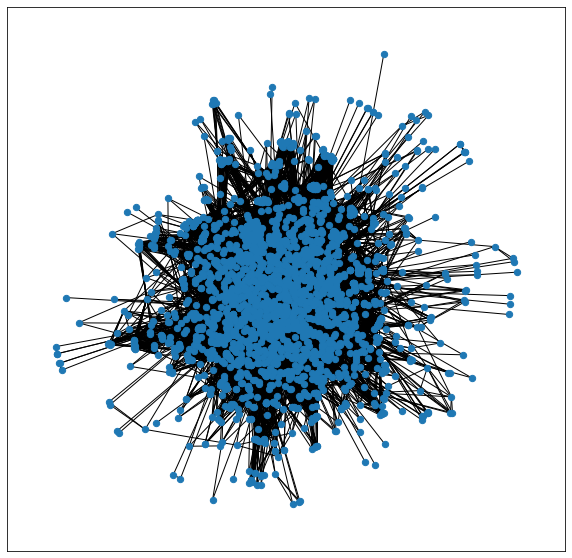

In [110]:
plt.figure(figsize=(10,10))

# Grab a subset of data 
nodelist = list()

for n in G.neighbors('u264'):
    nodelist.append(n)
    for m in G.neighbors(n):
        nodelist.append(m)
        
new_G = G.subgraph(nodelist).copy()

pos = nx.spring_layout(new_G, iterations=10, seed=1)

nx.draw_networkx_nodes(new_G, pos, node_size = 40)

nx.draw_networkx_edges(new_G, pos)

plt.show()

In [111]:
new_tuple = list()

for n1, n2 in top10_pairs:
    new_tuple.append((n1, n2, {'color': 'red'}))
    
G.add_edges_from(new_tuple)

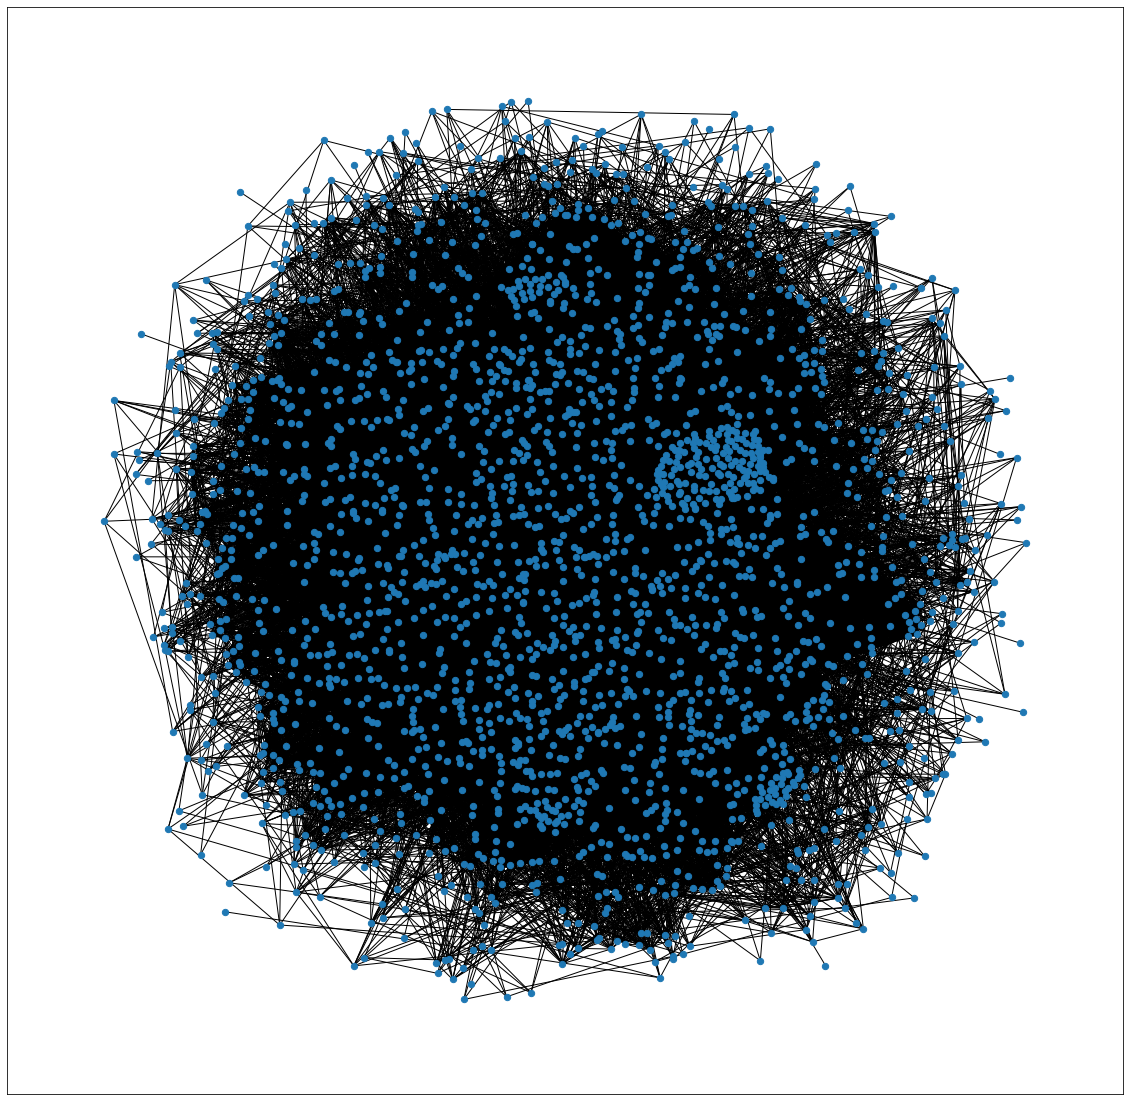

In [121]:
plt.figure(figsize=(20,20))

# Grab a subset of data 
nodelist = list()

for n in G.neighbors('u264'):
    nodelist.append(n)
    for m in G.neighbors(n):
        nodelist.append(m)

g = G.subgraph(nodelist).copy()

pos = nx.spring_layout(g, iterations=20, k=0.2, seed=1)

nx.draw_networkx_nodes(g, pos, node_size = 40)

nx.draw_networkx_edges(g, pos, edge_color=[d['color'] for n1,n2,d in g.edges(data=True)])

plt.show()

In [120]:
[(n1,n2) for n1,n2,d in g.edges(data=True) if d['color'] == 'red']

[('u264', 'u655'),
 ('u3082', 'u627'),
 ('u935', 'u741'),
 ('u363', 'u1208'),
 ('u741', 'u268'),
 ('u325', 'u89')]